In [4]:
#aqui tem as bibliotecas que vamos utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
sns.set(rc={'figure.figsize':(11.7,8.27)}) # isso é pras figuras ficarem maiores

In [5]:
df = pd.read_csv('Mall_Customers.csv',index_col=0)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [8]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [9]:
le = LabelEncoder()
df['Genre'] = le.fit_transform(df.Genre)
df.head()
# 1 - Male ,  0 - Famale

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [10]:
df.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [11]:
colunas = df.columns

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


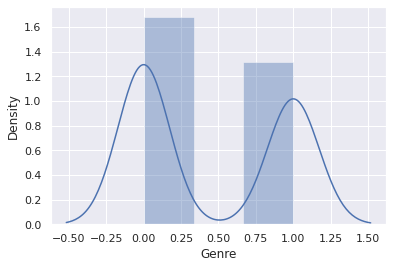

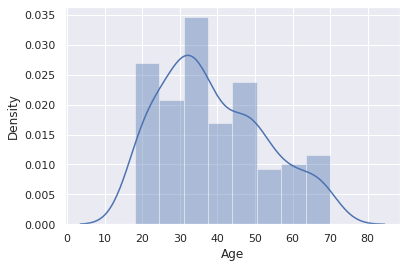

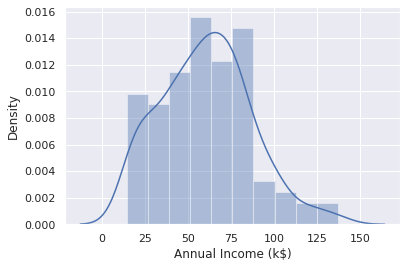

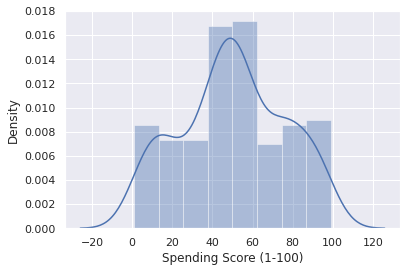

In [12]:
for col in colunas:
    plt.figure()
    sns.distplot(df[col])

In [13]:
# Vamos padronizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=colunas)
df_scaled.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

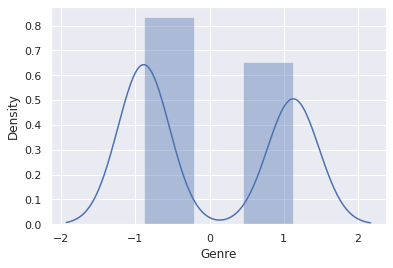

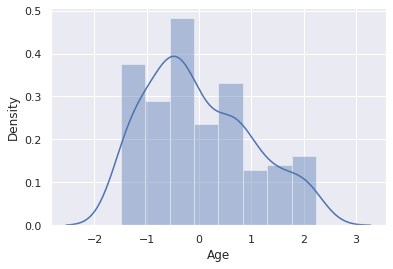

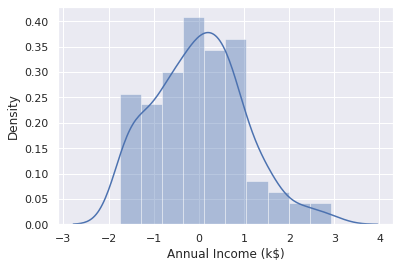

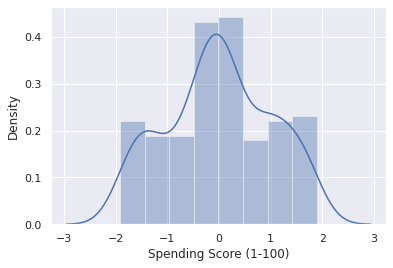

In [14]:
# Vamos ver como ficou a distribuição dos dados após a padronização
for col in colunas:
    plt.figure()
    sns.distplot(df_scaled[col])

Text(0, 0.5, 'Epsilon')

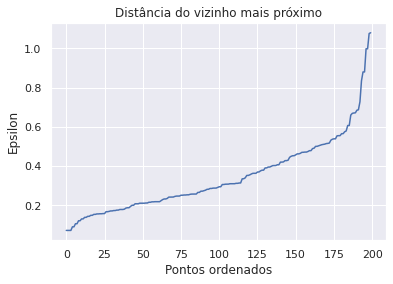

In [56]:
# Vamos ver o calculo co neighbors do sklearn para o DBSCAN  
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('Distância do vizinho mais próximo')
plt.xlabel('Pontos ordenados')
plt.ylabel('Epsilon')





In [75]:
# Usar o DBSCAN para agrupar os dados em 3 grupos
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan.fit(df_scaled)

# Vamos ver os grupos que foram criados
dbscan.labels_


array([-1,  0, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  0,  1,
        0,  2, -1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  1,  2,  1,  2,  1,  2,  1,  2,  2,  3,  1,  1,  2,  3,  1,  1,
        3,  1,  2,  1,  1,  1,  2,  3,  1,  2,  1,  1,  2,  2,  2,  1,  1,
        2,  1,  1,  1,  1,  1,  3,  2,  1,  1,  3,  1,  1,  2,  3,  1,  1,
        2,  3,  2,  1,  1,  2,  2,  2,  2,  1,  1,  3,  1,  1,  1,  1,  1,
        1,  3,  1,  1,  3,  1,  1,  2,  3, -1,  3,  2,  3,  1,  1,  2,  1,
        4,  3,  2,  1,  4,  3,  1,  1,  2,  3,  2,  1,  4,  3,  2,  3,  4,
        1,  4,  1,  2,  1,  2,  1,  1,  1,  2,  1,  2,  1,  2,  1,  4,  3,
        2,  3,  2,  3,  4,  1,  2,  3, -1,  3,  4,  1,  2,  1,  4,  3,  4,
        3,  4,  1,  4,  1, -1,  1, -1,  1, -1, -1, -1, -1])

In [72]:
# Vamos ver quantos grupos foram criados
pd.DataFrame(np.unique(dbscan.labels_))

,0
0,-1
1,0
2,1
3,2
4,3
5,4


In [76]:
# Vamos ver quantos elementos tem em cada grupo
cluster = pd.Series(dbscan.labels_)
cluster.value_counts()

 1    94
 2    40
 3    26
-1    19
 4    12
 0     9
dtype: int64

In [78]:
df['cluster'] = cluster

In [42]:
# Vamos ver os elementos que estão no grupo 0
df[dbscan.labels_ == 0].Genre.value_counts()


0    92
Name: Genre, dtype: int64

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

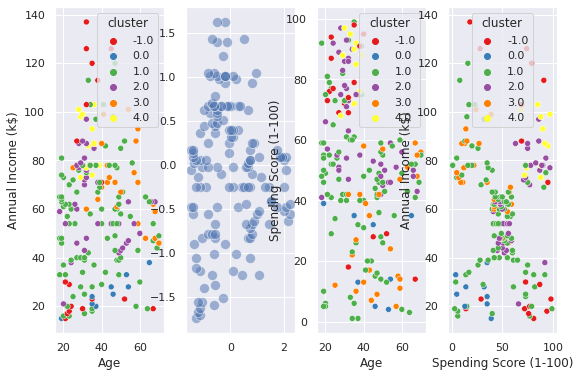

<Figure size 720x720 with 0 Axes>

In [89]:
#Criar um gráfico para ver os grupos que foram criados e sua distribuição   
f, axes = plt.subplots(1, 4,figsize=(9, 6))
plt.figure(figsize=(10,10))
sns.scatterplot(x=df.Age, y=df['Annual Income (k$)'], hue=df.cluster, palette='Set1', ax=axes[0])
sns.scatterplot(x=dbscan.components_[:,1], y=dbscan.components_[:,2], palette='Set1', alpha=0.5, s=100, ax=axes[1])
sns.scatterplot(x=df.Age, y=df['Spending Score (1-100)'], hue=df.cluster, palette='Set1', ax=axes[2]) 
sns.scatterplot(x=df['Spending Score (1-100)'], y=df['Annual Income (k$)'], hue=df.cluster, palette='Set1', ax=axes[3])
